In [43]:
from sklearn.ensemble import RandomForestRegressor, StackingRegressor
from sklearn.linear_model import LinearRegression
from xgboost import XGBRegressor
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import cross_val_predict
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV,KFold
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, confusion_matrix,r2_score,accuracy_score
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score
from catboost import CatBoostRegressor
from sklearn.model_selection import learning_curve
import joblib

In [44]:
data=pd.read_csv('c:\\Users\\sgupta1\\Desktop\\modified model\\updated data.csv',low_memory=False)
data_req_=data[['Adm. Sys.','Gov. Cont.','Func. Class','Terrain','Land Use','Operation','Acc. Ctrl.','No. Lns.','Spd Limit','AADT','Degree of Curve','Percent of Grade']]
data_req=data_req_.dropna()
x=data_req.drop(columns='AADT')
y=data_req['AADT']
y= np.log(y)
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.1,random_state=42)

In [32]:
transf=ColumnTransformer([
    ('onehot',OneHotEncoder(),[0,1,2,3,4,5,6]),
    ('scaler',StandardScaler(),[7,8,9,10])
])

In [47]:
transf=joblib.load("C:\\Users\\sgupta1\\Desktop\\modified model\\KNN model development files\\pipeline_fit.joblib")

In [48]:
x_data_train=transf.transform(x_train).astype(float)
x_data_test=transf.transform(x_test).astype(float)

In [49]:
k =5  # You can choose an appropriate value for k
knn__ = KNeighborsRegressor(n_neighbors=k)
knn__.fit(x_data_train, y_train)

KNeighborsRegressor()

In [50]:
y_pred = knn__.predict(x_data_test)

In [51]:
mse = mean_squared_error(y_test, y_pred)
rmse=np.sqrt(mse)
r2 = r2_score(y_test, y_pred)
print(f"Root Mean Squared Error: {rmse}")
print(f"R-squared: {r2}")

Root Mean Squared Error: 0.1378795176478491
R-squared: 0.9899565432087514


In [ ]:
y_train_pred = knn__.predict(x_data_train)

In [ ]:
mse_train = mean_squared_error(y_train, y_train_pred)
train_rmse=np.sqrt(mse_train)
train_rmse

In [ ]:
a=rmse/(134352-30)
b=train_rmse/(134352-30)
a

In [ ]:
b

In [ ]:
#percentage change
change=(a-b)/a

In [ ]:
if train_rmse < rmse:
    print("Model may be overfitting.")
else:
    print("Model performance is consistent.")

In [ ]:
data_to_predict = pd.DataFrame({'Adm. Sys.': ['18-STP URBAN, NON-STATE SYS.'], 'Gov. Cont.':['MUNICIPAL HWAY AGENCY'], 'Func. Class':['U / MIN ART'],'Terrain':['2-ROLLING'],'Land Use':['7-RESIDENTIAL'],'Operation':['2-TWO WAY'],'Acc. Ctrl.':['0-NONE'],'No. Lns.':2,'Spd Limit':30,'Degree of Curve':9.6,'Percent of Grade':3.2})
data_to_predict_encoded=transf.transform(data_to_predict)
predicted_aadt_knn = knn__.predict(data_to_predict_encoded)

In [ ]:
predicted_aadt_knn

In [9]:
param_grid = {'n_neighbors': [5,10,25,50,100]}
knn = KNeighborsRegressor()
grid_search = GridSearchCV(knn, param_grid, cv=5)
grid_search.fit(x_data_train, y_train)
best_params = grid_search.best_params_
best_params

{'n_neighbors': 5}

In [ ]:
from sklearn.model_selection import cross_val_score
scores=cross_val_score(knn__,x_data_train,y_train,scoring="neg_mean_squared_error",cv=10)
knn_rmse_scores=np.sqrt(-scores)
def displaying_scores(scores):
                      print('Scores :',scores)
                      print('Scores Mean:',scores.mean())
                      print('Standard Deviation:',scores.std())

displaying_scores(knn_rmse_scores)

In [38]:
y_pred=np.exp(y_pred)

In [39]:
x_test['predicted']=y_pred

In [40]:
y_test=np.exp(y_test)

In [41]:
x_test['actual']=y_test

In [42]:
x_test.to_csv("C:\\Users\\sgupta1\\Desktop\\modified model\\predicted data\\predicted_data.csv", index=False)

In [ ]:
predicted_aadt_knn

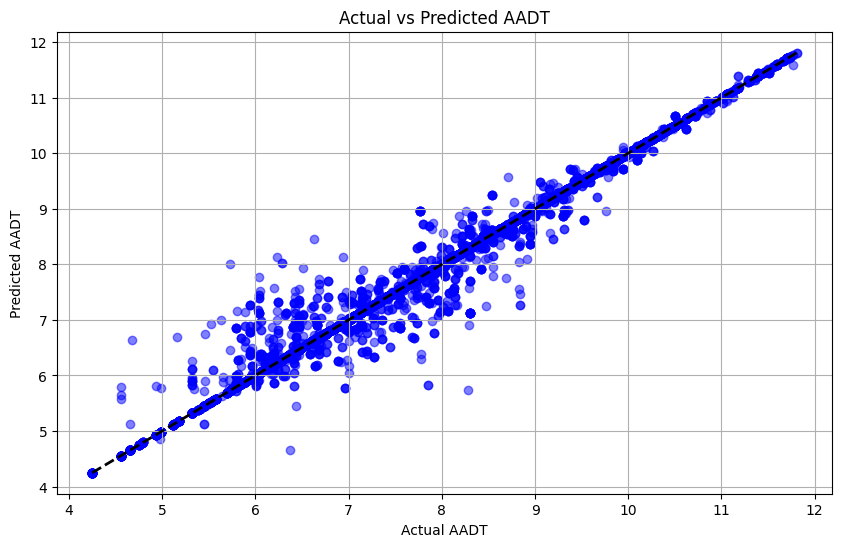

In [37]:
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, color='blue', alpha=0.5)
plt.title('Actual vs Predicted AADT')
plt.xlabel('Actual AADT')
plt.ylabel('Predicted AADT')
plt.grid(True)
plt.plot([y_pred.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)  # Diagonal line
plt.show()